In [203]:
#importing the required modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#reading the dataset
path_to_the_folder="/content/drive/MyDrive/EETBS 2021-2022/test_folder"
file_name="energydata_complete.csv"
path_to_the_file=os.path.join(path_to_the_folder,file_name)
my_DF=pd.read_csv(path_to_the_file,index_col=0,parse_dates=[0])
my_DF

#adding some extra columns derived from the date
my_DF.loc[:,"hour"]=my_DF.index.hour
my_DF.loc[:,"day of the week"]=my_DF.index.dayofweek


#adding weekend flag
my_DF.loc[my_DF.loc[:,"day of the week"]>4,"weekend"]=1
my_DF.loc[my_DF.loc[:,"day of the week"]<5,"weekend"]=0


#adding the working hours
my_DF.loc[:,"working hours"]=1
my_DF.loc[my_DF.loc[:,"day of the week"]>4,"working hours"]=0
my_DF.loc[my_DF.loc[:,"hour"]>17,"working hours"]=0
my_DF.loc[my_DF.loc[:,"hour"]<10,"working hours"]=0


#adding other data available from the date

my_DF.loc[:,"Month"]=my_DF.index.month


#generating some lagged columns to check if we can increase the correlation between the appliances and temperatures.


def laggedcolumncreator(df,parameter,lag_start,lag_end,lag_interval):
  for i in list(range(lag_start,lag_end,lag_interval)):
      laggedcolumn=parameter+"-"+str(i)+"min"
      df[laggedcolumn]=df[parameter].shift(i)
  return(df)

laggedcolumncreator(my_DF,"T1",20,121,20)
laggedcolumncreator(my_DF,"T2",20,121,20)
laggedcolumncreator(my_DF,"T3",20,121,20)
laggedcolumncreator(my_DF,"T4",20,121,20)
laggedcolumncreator(my_DF,"T5",20,121,20)
laggedcolumncreator(my_DF,"T6",20,121,20)
laggedcolumncreator(my_DF,"T7",20,121,20)
laggedcolumncreator(my_DF,"T8",20,121,20)
laggedcolumncreator(my_DF,"T9",20,121,20)
laggedcolumncreator(my_DF,"RH_1",20,121,20)
laggedcolumncreator(my_DF,"RH_2",20,121,20)
laggedcolumncreator(my_DF,"RH_3",20,121,20)
laggedcolumncreator(my_DF,"RH_4",20,121,20)
laggedcolumncreator(my_DF,"RH_5",20,121,20)
laggedcolumncreator(my_DF,"RH_6",20,121,20)
laggedcolumncreator(my_DF,"RH_7",20,121,20)
laggedcolumncreator(my_DF,"RH_8",20,121,20)
laggedcolumncreator(my_DF,"RH_9",20,121,20)

my_DF.dropna(inplace=True)
my_DF






,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,day of the week,weekend,working hours,Month,T1-20min,T1-40min,T1-60min,T1-80min,T1-100min,T1-120min,T2-20min,...,RH_3-60min,RH_3-80min,RH_3-100min,RH_3-120min,RH_4-20min,RH_4-40min,RH_4-60min,RH_4-80min,RH_4-100min,RH_4-120min,RH_5-20min,RH_5-40min,RH_5-60min,RH_5-80min,RH_5-100min,RH_5-120min,RH_6-20min,RH_6-40min,RH_6-60min,RH_6-80min,RH_6-100min,RH_6-120min,RH_7-20min,RH_7-40min,RH_7-60min,RH_7-80min,RH_7-100min,RH_7-120min,RH_8-20min,RH_8-40min,RH_8-60min,RH_8-80min,RH_8-100min,RH_8-120min,RH_9-20min,RH_9-40min,RH_9-60min,RH_9-80min,RH_9-100min,RH_9-120min
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-12 13:00:00,60,0,20.166667,46.993333,19.200000,43.760000,19.890000,44.790000,19.890000,44.163333,17.890000,50.560000,7.500000,81.00,18.000000,39.590000,18.5000,47.126667,17.166667,44.626667,7.500000,743.5,79.000000,7.000000,40.000000,4.100000,49.591931,49.591931,13,1,0.0,1,1,19.760000,19.890000,20.566667,21.50,20.890000,19.89,18.963333,...,45.400000,45.790000,47.300000,44.730000,44.663333,46.70,46.000000,46.590000,49.947500,45.566667,50.900000,50.000000,50.090000,50.790000,79.000000,55.200000,95.396667,96.030000,92.866667,87.496667,87.530000,84.256667,41.966667,45.966667,45.966667,43.466667,42.333333,41.626667,49.663333,53.790000,54.900000,50.723333,50.230000,48.900000,46.163333,49.966667,47.826667,45.560000,45.126667,45.530000
2016-01-12 13:10:00,290,0,20.100000,46.430000,19.100000,43.817500,19.890000,44.790000,19.856667,44.160000,17.856667,50.730000,7.400000,80.36,17.890000,39.590000,18.5000,47.230000,17.166667,44.560000,7.416667,743.5,79.333333,7.166667,40.000000,4.066667,24.779679,24.779679,13,1,0.0,1,1,19.700000,19.890000,20.500000,21.39,20.963333,19.89,18.963333,...,45.466667,45.656667,47.026667,44.790000,44.590000,46.70,46.000000,46.790000,49.696667,45.992500,50.426667,50.126667,50.090000,50.663333,79.730000,55.200000,95.796667,95.900000,92.966667,87.896667,86.956667,84.063333,41.826667,45.900000,45.966667,43.626667,42.066667,41.560000,49.590000,53.760000,54.966667,50.963333,50.290000,48.863333,46.030000,50.000000,47.900000,45.626667,45.126667,45.560000
2016-01-12 13:20:00,130,0,20.100000,46.030000,19.100000,43.838125,19.890000,44.790000,19.856667,44.026667,17.856667,50.863333,7.466667,80.36,17.890000,39.590000,18.5000,47.290000,17.100000,44.500000,7.333333,743.5,79.666667,7.333333,40.000000,4.033333,24.217476,24.217476,13,1,0.0,1,1,19.700000,19.890000,20.500000,21.39,21.033333,19.89,18.890000,...,45.400000,45.663333,46.826667,44.933333,44.693333,46.70,46.030000,46.790000,49.166667,45.890000,49.930000,50.200000,50.090000,50.530000,79.256667,55.090000,96.260000,95.966667,93.093333,88.633333,86.563333,83.156667,41.663333,45.826667,46.200000,43.760000,43.633333,41.433333,49.466667,53.700000,55.090000,51.163333,50.163333,48.730000,45.863333,50.000000,48.030000,45.700000,45.060000,45.500000
2016-01-12 13:30:00,140,0,20.066667,45.363333,19.100000,43.745000,19.890000,44.863333,19.790000,43.863333,17.790000,50.933333,7.656667,78.79,17.890000,39.590000,18.5000,47.330000,17.100000,44.400000,7.250000,743.5,80.000000,7.500000,40.000000,4.000000,8.672117,8.672117,13,1,0.0,1,1,19.700000,19.890000,20.426667,21.29,21.100000,19.89,18.890000,...,45.400000,45.590000,46.633333,45.000000,45.026667,46.79,46.163333,46.933333,48.426667,45.723333,49.656667,50.230000,50.030000,50.500000,78.393333,55.090000,96.466667,95.933333,94.045000,89.026667,86.330000,83.423333,41.590000,45.722500,46.200000,43.933333,43.633333,41.290000,49.400000,53.875000,55.030000,51.500000,50.030000,48.590000,45.730000,50.000000,48.090000,45.790000,45.000000,45.400000
2016-01-12 13:40:00,240,0,20.000000,44.963333,19.100000,43.595556,19.890000,44.826667,19.730000,43.530000,17.790000,51.000000,7.530000,78.19,17.890000,39.590000,18.5000,47.282500,17.100000,44.326667,7.1

In [204]:
#choosing targets and features

target=my_DF["Appliances"]
features=my_DF.drop("Appliances",axis=1)

#choosing the test,validation and trainining data

test_DF=my_DF.loc["2016-05-15":"2016-05-27"]
test_target=test_DF["Appliances"]
test_features=test_DF.drop("Appliances",axis=1)

training_DF=my_DF.loc["2016-01-12":"2016-04-30"]

validation_DF=my_DF.loc["2016-05-01":"2016-05-14"]

In [205]:
#fitting linear regression on the data

from sklearn import linear_model
linear_reg=linear_model.LinearRegression()
training_target=training_DF["Appliances"]
training_features=training_DF.drop("Appliances",axis=1)


linear_reg.fit(training_features,training_target)

LinearRegression()

In [206]:
#creating the validation features and target

validation_target=validation_DF["Appliances"]
validation_features=validation_DF.drop("Appliances",axis=1)

predicted_consumption_validation=linear_reg.predict(validation_features)

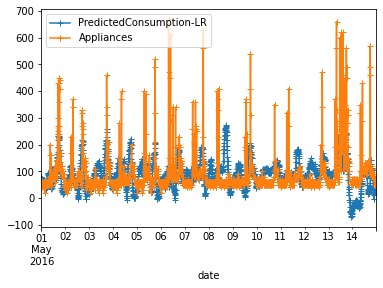

In [207]:
#comparing the real value with the validated data

Comparison_DF=pd.DataFrame(predicted_consumption_validation,index=validation_target.index,columns=["PredictedConsumption-LR"])

Comparison_DF=Comparison_DF.join(validation_target)

Comparison_DF.plot(marker="+")

In [213]:
#calculating the performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MAE_LR_validation=mean_absolute_error(predicted_consumption_validation,validation_target)
MSE_LR_validation=mean_squared_error(predicted_consumption_validation,validation_target)
R2_LR_validation=r2_score(predicted_consumption_validation,validation_target)

print("MAE_LR: "+str(round(MAE_LR_validation,2))+" MSE_LR: "+str(round(MSE_LR_validation,2))+" R2 Score_LR: "+str(round(R2_LR_validation,4)))


#It appeas that linear regression model is a terrible choice for our data.

MAE_LR: 52.93 MSE_LR: 6767.06 R2 Score_LR: -1.4835


In [209]:
#applying Random Forrest Model

from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor()



In [212]:
RF_reg.fit(training_features,training_target)
predicted_consumption_validation_RF = RF_reg.predict(validation_features)

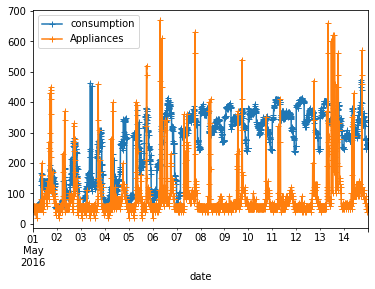

In [222]:
#comparing the real values compared with the ones estimated by RF_reg

Comparison_DF_RF=pd.DataFrame(predicted_consumption_validation_RF,index=validation_target.index,columns=["consumption"])
Comparison_DF_RF=Comparison_DF_RF.join(validation_target)
Comparison_DF_RF.plot(marker="+")

In [223]:
##calculating the performance metrics

MAE_RF_validation=mean_absolute_error(predicted_consumption_validation_RF,validation_target)
MSE_RF_validation=mean_squared_error(predicted_consumption_validation_RF,validation_target)
R2_RF_validation=r2_score(predicted_consumption_validation_RF,validation_target)

print("MAE_LR: "+str(round(MAE_LR_validation,2))+" MSE_LR: "+str(round(MSE_LR_validation,2))+" R2 Score_LR: "+str(round(R2_LR_validation,4)))


#It appeas that Random Forest model is a terrible choice for our data.

MAE_LR: 52.93 MSE_LR: 6767.06 R2 Score_LR: -1.4835


In [236]:
#time series split (cross validation for time-series data)
from sklearn.model_selection import TimeSeriesSplit
tscv =TimeSeriesSplit(n_splits=10)
DF_trainingAndValidation=my_DF["2016-01-12":"2016-05-14"]
DF_target_trainingAndValidation=DF_trainingAndValidation["Appliances"]
DF_features_trainingAndValidation = DF_trainingAndValidation.drop(["Appliances"], axis=1)
for train_index,validation_index in tscv.split(DF_features_trainingAndValidation):
  print("Train index")
  print(train_index)
  print("validation index")
  print(validation_index)

Train index
[   0    1    2 ... 1615 1616 1617]
validation index
[1618 1619 1620 ... 3231 3232 3233]
Train index
[   0    1    2 ... 3231 3232 3233]
validation index
[3234 3235 3236 ... 4847 4848 4849]
Train index
[   0    1    2 ... 4847 4848 4849]
validation index
[4850 4851 4852 ... 6463 6464 6465]
Train index
[   0    1    2 ... 6463 6464 6465]
validation index
[6466 6467 6468 ... 8079 8080 8081]
Train index
[   0    1    2 ... 8079 8080 8081]
validation index
[8082 8083 8084 ... 9695 9696 9697]
Train index
[   0    1    2 ... 9695 9696 9697]
validation index
[ 9698  9699  9700 ... 11311 11312 11313]
Train index
[    0     1     2 ... 11311 11312 11313]
validation index
[11314 11315 11316 ... 12927 12928 12929]
Train index
[    0     1     2 ... 12927 12928 12929]
validation index
[12930 12931 12932 ... 14543 14544 14545]
Train index
[    0     1     2 ... 14543 14544 14545]
validation index
[14546 14547 14548 ... 16159 16160 16161]
Train index
[    0     1     2 ... 16159 16160 16

In [241]:
R2Score_list = []
for train_index,validation_index in tscv.split(DF_features_trainingAndValidation):
    DF_train_features=DF_features_trainingAndValidation.iloc[train_index,:]
    DF_validation_features=DF_features_trainingAndValidation.iloc[validation_index,:]
    DF_train_target = DF_target_trainingAndValidation.iloc[train_index]
    DF_validation_target = DF_target_trainingAndValidation.iloc[validation_index]
    RF_reg.fit(DF_train_features,DF_train_target)
    Predict_RF_comparison_tscv = pd.DataFrame(index=DF_validation_target.index)
    Predict_RF_comparison_tscv["prediction"]= RF_reg.predict(DF_validation_features)
    R2Score_thisSegment=r2_score(Predict_RF_comparison_tscv["prediction"],DF_validation_target)
    R2Score_list.append(R2Score_thisSegment)
print(R2Score_list)

[-2.0714766345333797, -1.6089336785718702, -1.2509754139994782, -2.300265927277758, -0.9655187024443239, -1.2830269088613027, -0.7893052320973424, -1.2394508044809913, -1.0035737804999902, -4.525736274412301]


In [242]:
#evaluating the test data

RF_reg.fit(DF_features_trainingAndValidation,DF_target_trainingAndValidation)

RandomForestRegressor()

In [243]:
predicted_consumption_test_RF=RF_reg.predict(test_features)

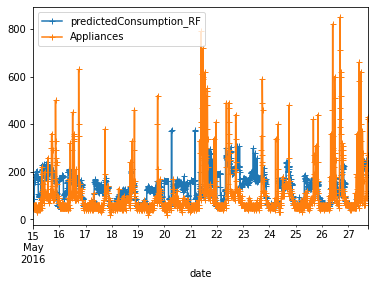

In [250]:
#comparing the data
DF_comparison_consumption_RF_test=pd.DataFrame(predicted_consumption_test_RF, index=test_target.index, columns=["predictedConsumption_RF"])
DF_comparison_consumption_RF_test=DF_comparison_consumption_RF_test.join(test_target)
DF_comparison_consumption_RF_test.plot(marker="+")



In [252]:
#calculating the performance metrics

MAE_RF_test=mean_absolute_error(predicted_consumption_test_RF,test_target)
MSE_RF_test=mean_squared_error(predicted_consumption_test_RF,test_target)
R2_RF_test=r2_score(predicted_consumption_test_RF,test_target)
print("MAE_RF: "+str(round(MAE_RF_test,2))+" MSE_RF: "+str(round(MSE_RF_test,2))+" R2 Score_RF: "+str(round(R2_RF_test,4)))

MAE_RF: 69.38 MSE_RF: 10556.93 R2 Score_RF: -2.3344
